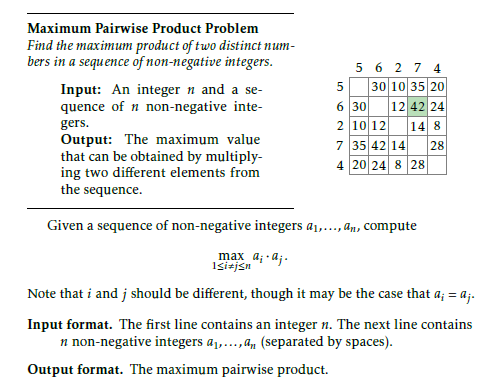

## 0. Theoretical approximate time

If the constrains are

Constrains. $ 2 ≤ n ≤ 10; 0≤ a_1, . . . ,a_n ≤ 10$

If the time by case test is 1.5$\mu s$ ( i.e. approx. 666 millions of cases tested by second).

**What is the time required to test all cases for this problem?**

Hint: Use the fact that $$ \sum_{i=0}^n r^i = 1 + r + r^2 + r^3 + \cdots + r^{n-1} + r^n   = \frac{r^{n+1} -1}{r-1} = \frac{1-r^{n+1}}{1-r} $$



Dado que la logitud de la lista es de 11, del 0 al 10, entonces el número de secuancias total es de 11^n entonces el número de total de casos es: $$ \sum_{i=0}^{11} r^i = \frac{11^{12} - 1}{11 - 1} $$ la cual da como resultado: 313.842.837.672 y dividido por 666000000 (número de casos que se hacen por segundo)  da: 471.235492 segundos

In [ ]:
print((((11**12)-1)/(11-1))/666000000)

471.235492


# Experimental time all cases test

## 1. Write in Python a solution using lists, max and remove

In [7]:
def MaximumPairwiseProductMaxRemove(n, L):
    maximun = 0
    second_maximun = 0

    sub_list = L[:n]

    maximun = max(sub_list)
    sub_list.remove(maximun)
    second_maximun = max(sub_list)

    return maximun * second_maximun

In [ ]:
%time
L = [10,4]
result = MaximumPairwiseProductMaxRemove(len(L), L)
print(result)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
40


In [ ]:
%time
L = [10,4,10,1]
result = MaximumPairwiseProductMaxRemove(len(L), L)
print(result)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.63 µs
100


In [ ]:
%time
L = [10,4,10,1,5,6,2,8,7,3]
result = MaximumPairwiseProductMaxRemove(len(L), L)
print(result)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
100


## 2. Write in Python a solution that search for the max and second_max sequencialy

In [8]:
def MaximumPairwiseProductMaxSecondMax(n, L):
  maximun = 0
  second_maximun = 0

  sub_list = L[:n]

  for i in range(len(sub_list)):
    if sub_list[i] > maximun:
        second_maximun = maximun
        maximun = sub_list[i]
    elif sub_list[i] > second_maximun:
        second_maximun = sub_list[i]

  return maximun * second_maximun


In [ ]:
%time
L = [10,4]
result = MaximumPairwiseProductMaxSecondMax(len(L), L)
print(result)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
40


In [ ]:
%time
L = [10,4,10,1]
result = MaximumPairwiseProductMaxSecondMax(len(L), L)
print(result)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
100


In [ ]:
%time
L = [10,4,10,1,5,6,2,8,7,3]
result = MaximumPairwiseProductMaxSecondMax(len(L), L)
print(result)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
100


## 3. Usng **itertools** produce all the all the test cases for the problem with  $ 2 ≤ n ≤ 8$, call the two solutions in each case and comapre the answers (census test) and report the time.

In [26]:
from itertools import product
import time

k = 9
for n in range(2, 9):
    for i in product(range(k + 1), repeat=n):
        print(i)
        start_time = time.time()
        first = MaximumPairwiseProductMaxSecondMax(n, list(i))
        retime = time.time() - start_time
        print(f"First function time: {retime}")

        start_time = time.time()
        second = MaximumPairwiseProductMaxRemove(n, list(i))
        retime = time.time() - start_time
        print(f"Second function time: {retime}")

        if abs(first - second) < 1e-6:
            print("Same time (within tolerance)")
        else:
            print("Different time")

Se han truncado las últimas 5000 líneas del flujo de salida.
Second function time: 3.5762786865234375e-06
Same time (within tolerance)
(6, 8, 4, 0, 7)
First function time: 3.5762786865234375e-06
Second function time: 2.6226043701171875e-06
Same time (within tolerance)
(6, 8, 4, 0, 8)
First function time: 1.5735626220703125e-05
Second function time: 2.6226043701171875e-06
Same time (within tolerance)
(6, 8, 4, 0, 9)
First function time: 3.5762786865234375e-06
Second function time: 2.384185791015625e-06
Same time (within tolerance)
(6, 8, 4, 1, 0)
First function time: 2.86102294921875e-06
Second function time: 2.384185791015625e-06
Same time (within tolerance)
(6, 8, 4, 1, 1)
First function time: 3.0994415283203125e-06
Second function time: 2.1457672119140625e-06
Same time (within tolerance)
(6, 8, 4, 1, 2)
First function time: 2.6226043701171875e-06
Second function time: 2.1457672119140625e-06
Same time (within tolerance)
(6, 8, 4, 1, 3)
First function time: 2.86102294921875e-06
Second 

KeyboardInterrupt: 

La prueba se pausó debido al tiempo que estaba tomando completarla.


## 4. Use the modification in the following cell of the code from https://www.geeksforgeeks.org/print-all-permutations-with-repetition-of-characters/ to produce permutations with repetion to  produce all the all the test cases for the problem with $ 2 ≤ n ≤ 8$, call the two solutions in each case and comapre the answers (census test) and report the time.

In [25]:
import time

l = []
def toString(List):
    return ''.join(List)

def allLexicographicRecur (string, data, last, index):
    length = len(string)

    for i in range(length):

        data[index] = string[i]

        if index==last:
          if len(set(data[:last + 1])) > 1:
            print(toString(data))
            l.append(toString(data))
        else:
            allLexicographicRecur(string, data, last, index+1)

def allLexicographic(string):
    length = len(string)

    data = [""] * (length+1)

    string = sorted(string)

    allLexicographicRecur(string, data, length-1, 0)

string = "23456789"
print ("All permutations with repetition of " + string + " are:")
allLexicographic(string)
n = 3
for i in l:
    finallist = []
    auxlist = list(i)
    for j in auxlist:
        finallist.append(int(j))
    start_time = time.time()
    first = MaximumPairwiseProductMaxSecondMax(n,finallist)
    retime = time.time() - start_time
    print(f"First function time: {retime}")

    start_time = time.time()
    j = list(i)
    second = MaximumPairwiseProductMaxRemove(n,finallist)
    retime = time.time() - start_time
    print(f"Second function time: {retime}")


    if first == second:
      print("Same time")
    else:
      print("ifferent time")


Se han truncado las últimas 5000 líneas del flujo de salida.
28999838
28999839
28999842
28999843
28999844
28999845
28999846
28999847
28999848
28999849
28999852
28999853
28999854
28999855
28999856
28999857
28999858
28999859
28999862
28999863
28999864
28999865
28999866
28999867
28999868
28999869
28999872
28999873
28999874
28999875
28999876
28999877
28999878
28999879
28999882
28999883
28999884
28999885
28999886
28999887
28999888
28999889
28999892
28999893
28999894
28999895
28999896
28999897
28999898
28999899
28999922
28999923
28999924
28999925
28999926
28999927
28999928
28999929
28999932
28999933
28999934
28999935
28999936
28999937
28999938
28999939
28999942
28999943
28999944
28999945
28999946
28999947
28999948
28999949
28999952
28999953
28999954
28999955
28999956
28999957
28999958
28999959
28999962
28999963
28999964
28999965
28999966
28999967
28999968
28999969
28999972
28999973
28999974
28999975
28999976
28999977
28999978
28999979
28999982
28999983
28999984
28999985
28999986
28999987
289

KeyboardInterrupt: 

El código se pausó debido a que estaba tomando mucho tiempo.


Time census test geeksfrogeeks:

## 5. Write a unformly distributed random case generator  for $2 \le n \le 10 $ and $0  \le a_1,a_2, \cdots, a_n \le 10 $ and print time in which it finds $[0,1,2,3,4,5,6,7,8,9]$ or  $[1,2,3,4,5,6,7,8,9,10]$ and stop if it takes less than 5 mins and print -1 otherwise

Stoping time:

In [27]:
import random
import time

start_time = time.time()

while time.time() - start_time < 300:  # 300 seconds = 5 minutes
    n = random.randint(2, 10)
    a = [random.randint(0, 10) for _ in range(n)]

    if a == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] or a == [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        print(time.time() - start_time)
        break

else:
    print("-1")

-1
